In [1]:
import numpy as np
import sys

sys.path.append('../src')

import cpu
import program
import importlib
cpu = importlib.reload(cpu)
program = importlib.reload(program)

p = program.Program.from_file('../programs/initial_program.txt')
p_snake = program.Program.from_file('../programs/snake_game.txt')
p_first = program.Program.from_file('../programs/first_program.txt')
p_2 = program.Program.from_file('../programs/program2.txt')
p_branch = program.Program.from_file('../programs/branch_program.txt')
p = program.Program.from_array(np.array(['a9', 'c0', 'aa', 'e8', '69', 'c4', '00']))
p_push = program.Program.from_array(np.array(['a2', '00', 'a0', '00', '8a', '99', '00', '02', '48', 'e8', 'c8', 'c0', '10', 'd0', 'f5', '68', '99', '00', '02', 'c8', 'c0', '20', 'd0', 'f7']))
p_pull = program.Program.from_array(np.array(['99', '00', '02', 'c8', 'c0', '20', 'd0', 'f7']))
p_jump = program.Program.from_file('../programs/jump_program.txt')
p_jsr_rts = program.Program.from_file('../programs/jsr_rts.txt')

In [2]:
# Initialise CPU
daveNES = cpu.MOS6502(debug = False)
daveNES.initialise_RAM()

In [3]:
daveNES.load_program(p_snake)
daveNES.reset()

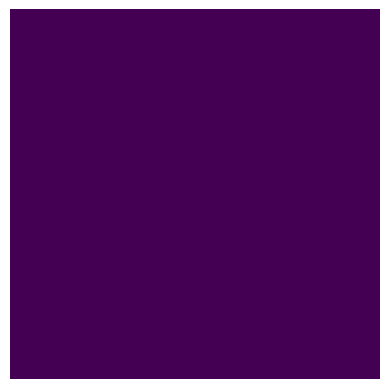

0x20, JSR
PC: 0x0600, SP: 0xff, A: 0x00, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


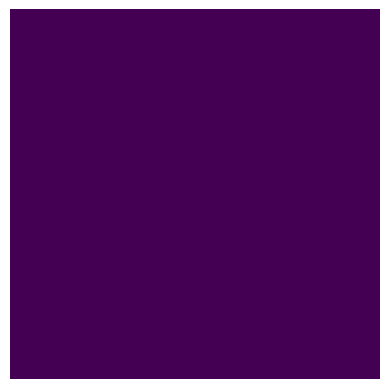

0x20, JSR
PC: 0x0606, SP: 0xfd, A: 0x00, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


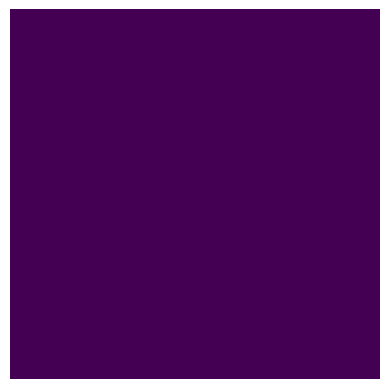

0xa9, LDA
PC: 0x060d, SP: 0xfb, A: 0x00, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


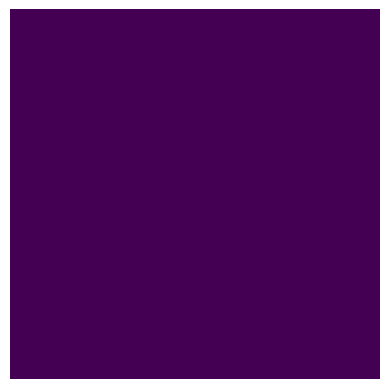

0x85, STA
PC: 0x060f, SP: 0xfb, A: 0x02, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


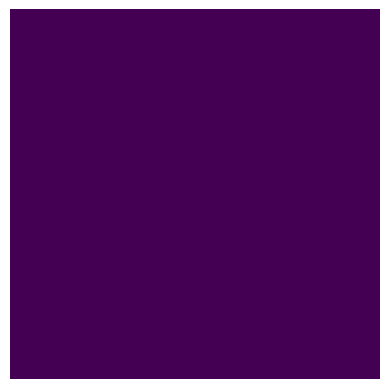

0xa9, LDA
PC: 0x0611, SP: 0xfb, A: 0x02, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


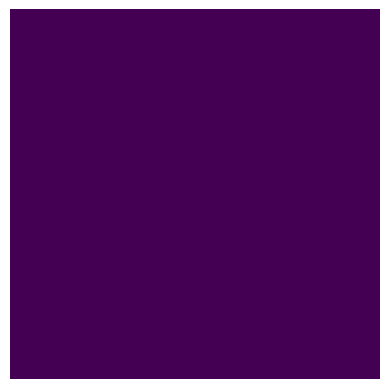

0x85, STA
PC: 0x0613, SP: 0xfb, A: 0x04, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


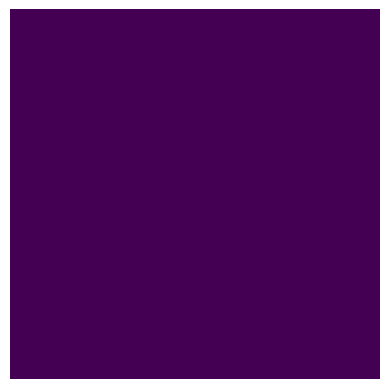

0xa9, LDA
PC: 0x0615, SP: 0xfb, A: 0x04, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


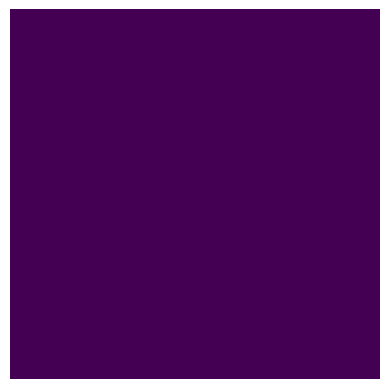

0x85, STA
PC: 0x0617, SP: 0xfb, A: 0x11, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


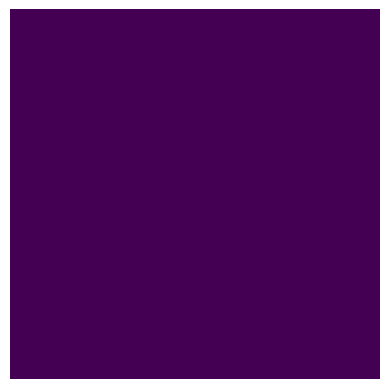

0xa9, LDA
PC: 0x0619, SP: 0xfb, A: 0x11, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


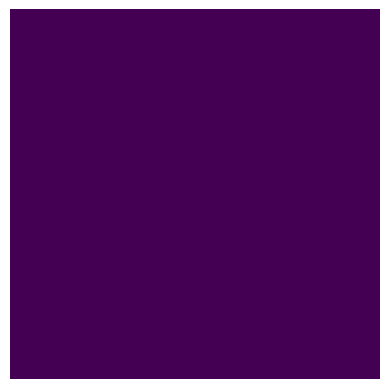

0x85, STA
PC: 0x061b, SP: 0xfb, A: 0x10, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


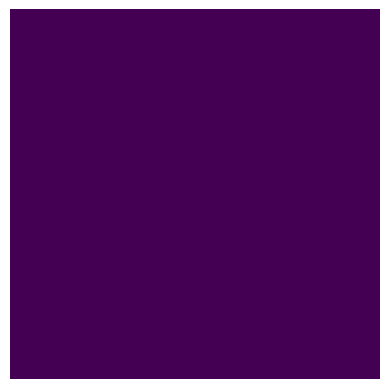

0xa9, LDA
PC: 0x061d, SP: 0xfb, A: 0x10, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


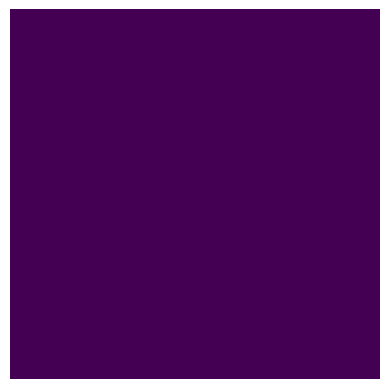

0x85, STA
PC: 0x061f, SP: 0xfb, A: 0x0f, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


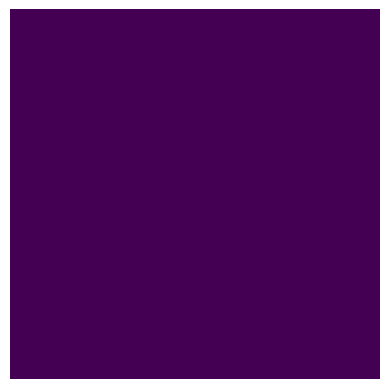

0xa9, LDA
PC: 0x0621, SP: 0xfb, A: 0x0f, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


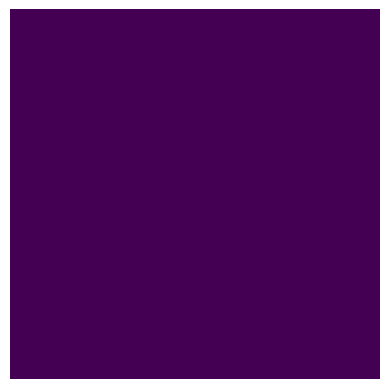

0x85, STA
PC: 0x0623, SP: 0xfb, A: 0x04, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


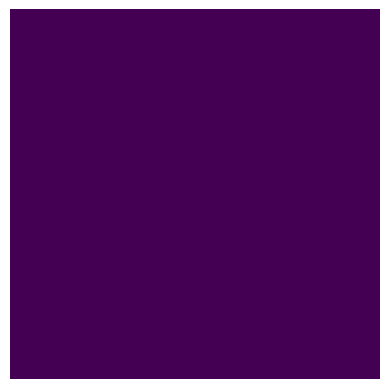

0x85, STA
PC: 0x0625, SP: 0xfb, A: 0x04, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


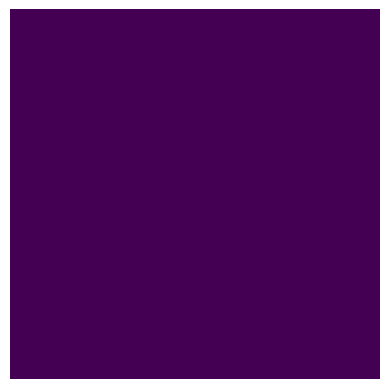

0x85, STA
PC: 0x0627, SP: 0xfb, A: 0x04, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


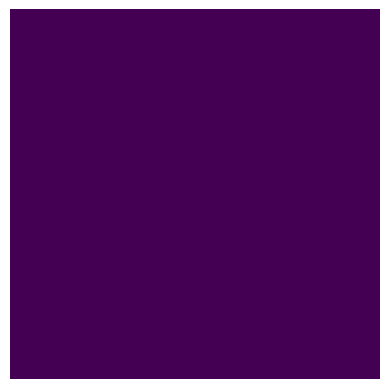

0x60, RTS
PC: 0x0629, SP: 0xfb, A: 0x04, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


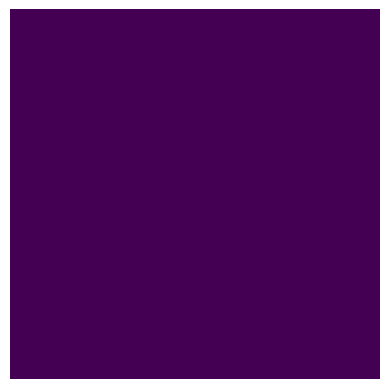

0x20, JSR
PC: 0x0609, SP: 0xfd, A: 0x04, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


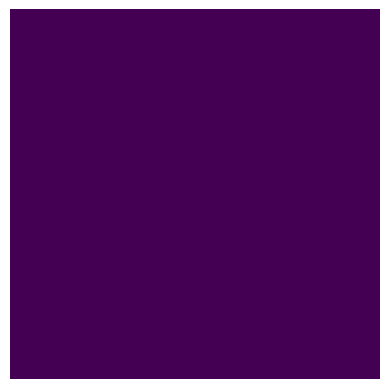

0xa5, LDA
PC: 0x062a, SP: 0xfb, A: 0x04, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


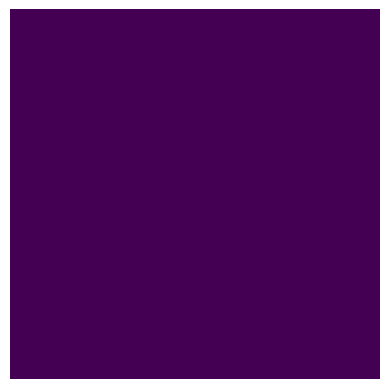

0x85, STA
PC: 0x062c, SP: 0xfb, A: 0x0f, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


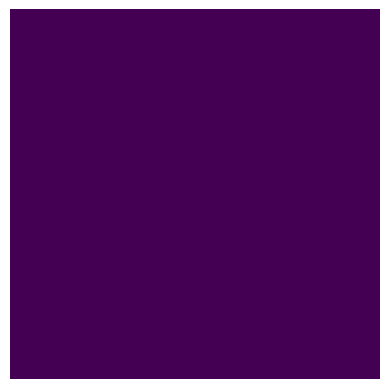

0xa5, LDA
PC: 0x062e, SP: 0xfb, A: 0x0f, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


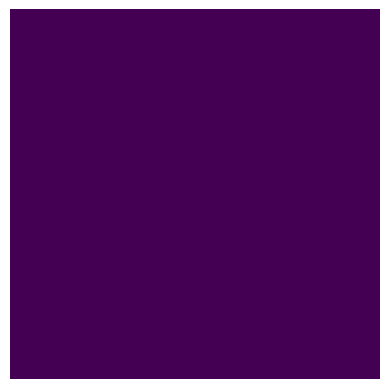

0x29, AND
PC: 0x0630, SP: 0xfb, A: 0x04, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


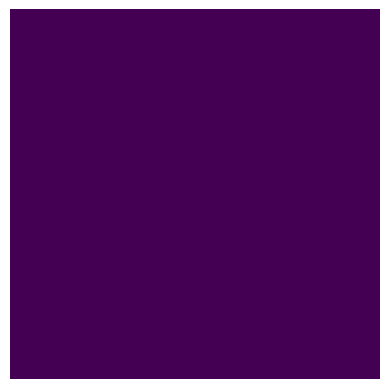

0x18, CLC
PC: 0x0632, SP: 0xfb, A: 0x00, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 1, 0]


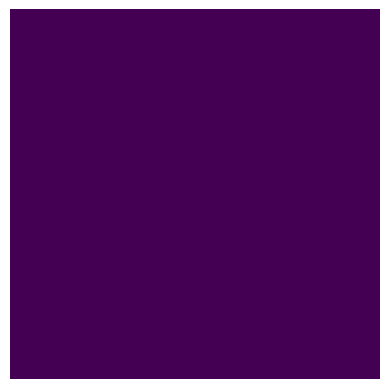

0x69, ADC
PC: 0x0633, SP: 0xfb, A: 0x00, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 1, 0]


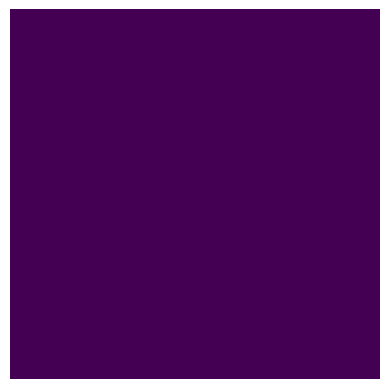

0x85, STA
PC: 0x0635, SP: 0xfb, A: 0x02, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


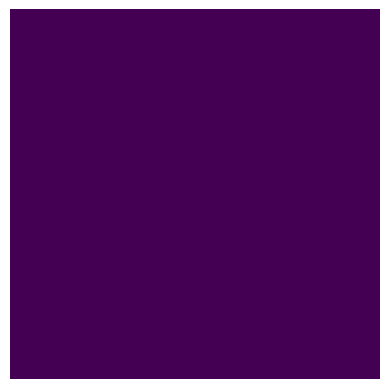

0x60, RTS
PC: 0x0637, SP: 0xfb, A: 0x02, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


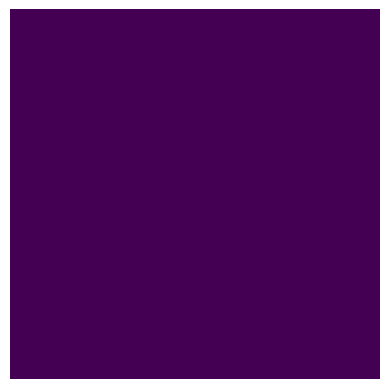

0x60, RTS
PC: 0x060c, SP: 0xfd, A: 0x02, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


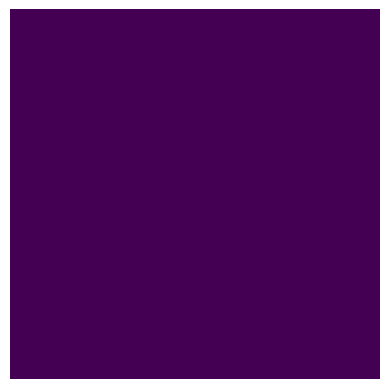

0x20, JSR
PC: 0x0603, SP: 0xff, A: 0x02, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


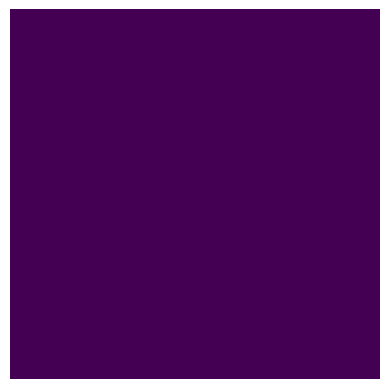

0x20, JSR
PC: 0x0638, SP: 0xfd, A: 0x02, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


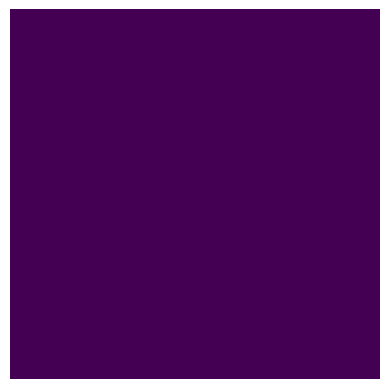

0xa5, LDA
PC: 0x064d, SP: 0xfb, A: 0x02, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


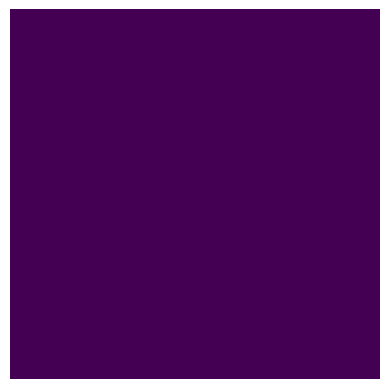

0xc9, CMP
PC: 0x064f, SP: 0xfb, A: 0x00, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 1, 0]


c:\Users\David\Documents\Coding\daveNES\notebooks\../src\cpu.py:500: RuntimeWarning: overflow encountered in ubyte_scalars
  result = self.r_accumulator - value


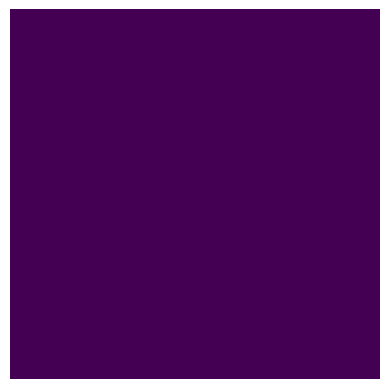

0xf0, BEQ
PC: 0x0651, SP: 0xfb, A: 0x00, X: 0x00, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


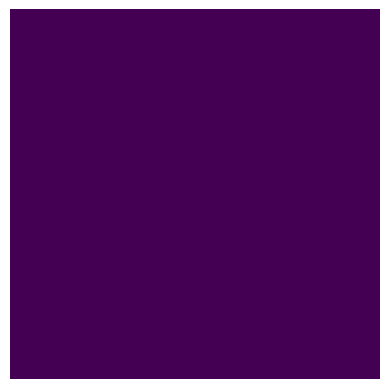

0xc9, CMP
PC: 0x0653, SP: 0xfb, A: 0x00, X: 0x00, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


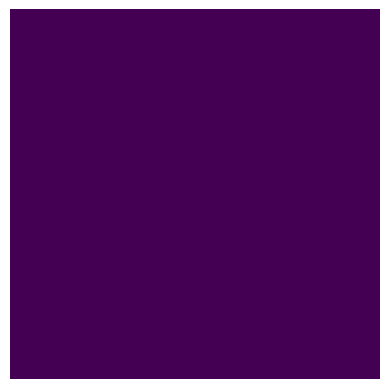

0xf0, BEQ
PC: 0x0655, SP: 0xfb, A: 0x00, X: 0x00, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


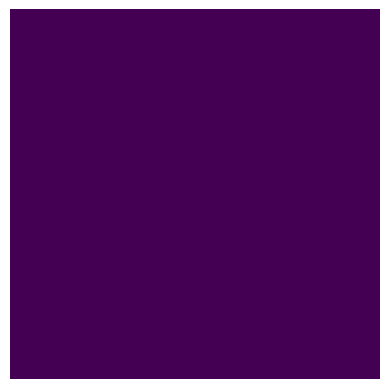

0xc9, CMP
PC: 0x0657, SP: 0xfb, A: 0x00, X: 0x00, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


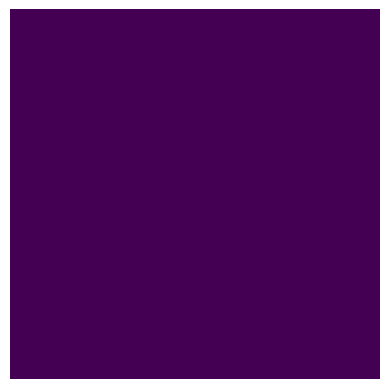

0xf0, BEQ
PC: 0x0659, SP: 0xfb, A: 0x00, X: 0x00, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


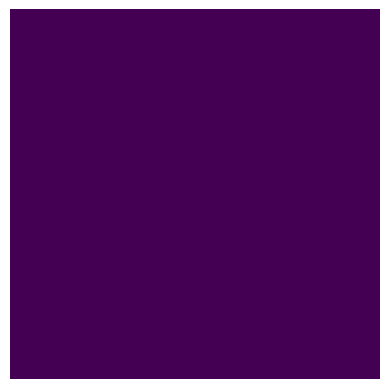

0xc9, CMP
PC: 0x065b, SP: 0xfb, A: 0x00, X: 0x00, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


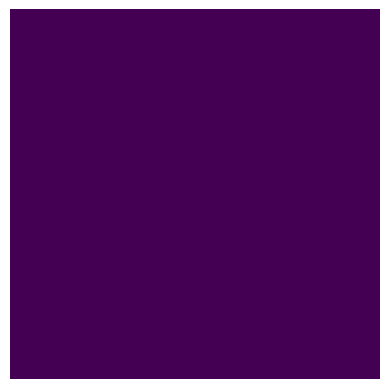

0xf0, BEQ
PC: 0x065d, SP: 0xfb, A: 0x00, X: 0x00, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


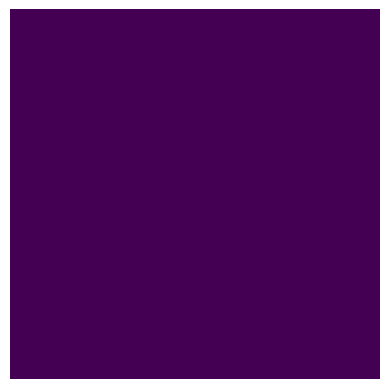

0x60, RTS
PC: 0x065f, SP: 0xfb, A: 0x00, X: 0x00, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


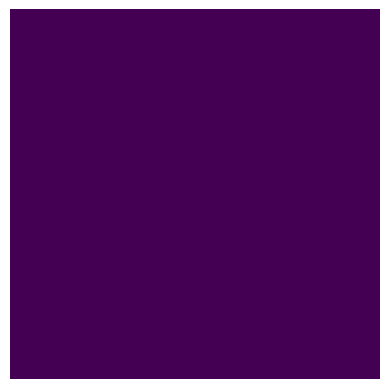

0x20, JSR
PC: 0x063b, SP: 0xfd, A: 0x00, X: 0x00, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


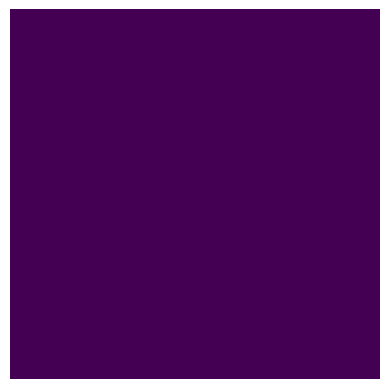

0x20, JSR
PC: 0x068d, SP: 0xfb, A: 0x00, X: 0x00, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


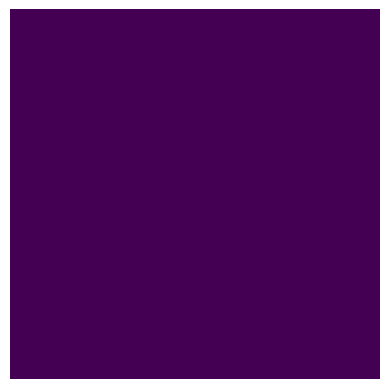

0xa5, LDA
PC: 0x0694, SP: 0xf9, A: 0x00, X: 0x00, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


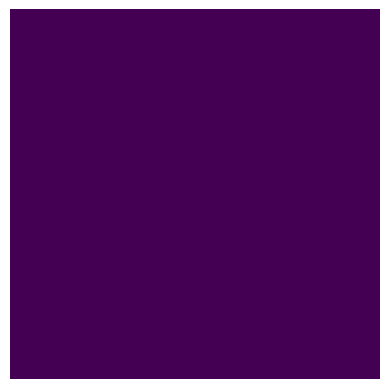

0xc5, CMP
PC: 0x0696, SP: 0xf9, A: 0x0f, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


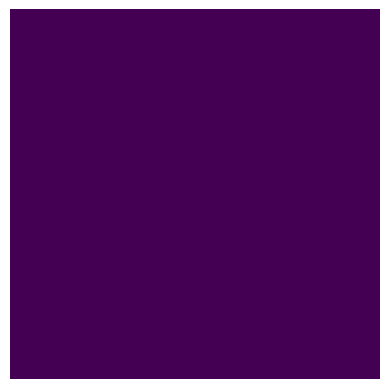

0xd0, BNE
PC: 0x0698, SP: 0xf9, A: 0x0f, X: 0x00, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


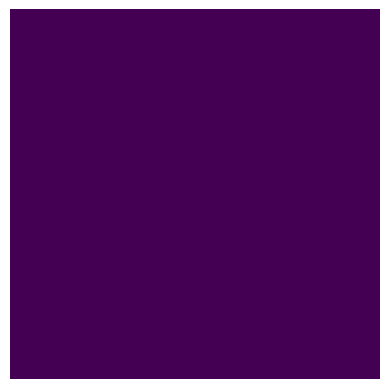

0x60, RTS
PC: 0x06a7, SP: 0xf9, A: 0x0f, X: 0x00, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


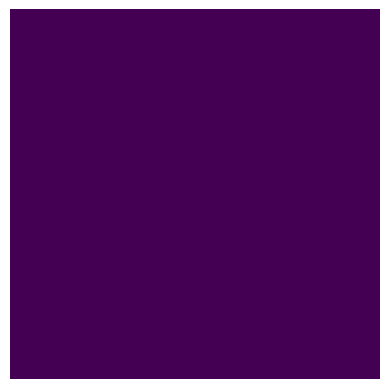

0x20, JSR
PC: 0x0690, SP: 0xfb, A: 0x0f, X: 0x00, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


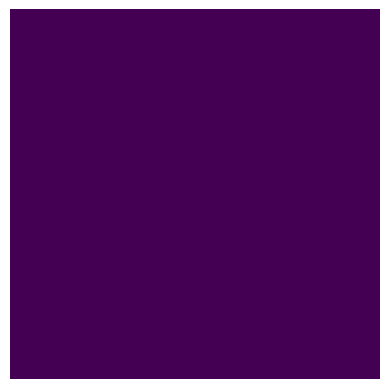

0xa2, LDX
PC: 0x06a8, SP: 0xf9, A: 0x0f, X: 0x00, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


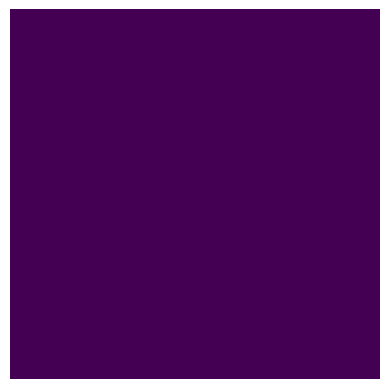

0xb5, LDA
PC: 0x06aa, SP: 0xf9, A: 0x0f, X: 0x02, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


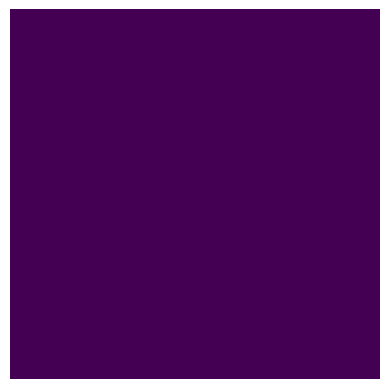

0xc5, CMP
PC: 0x06ac, SP: 0xf9, A: 0x10, X: 0x02, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


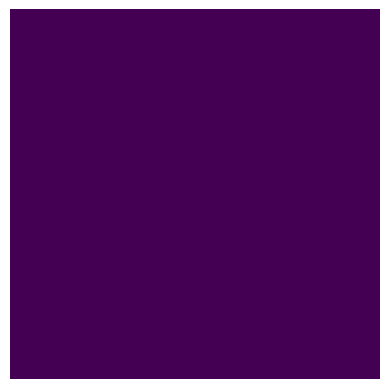

0xd0, BNE
PC: 0x06ae, SP: 0xf9, A: 0x10, X: 0x02, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


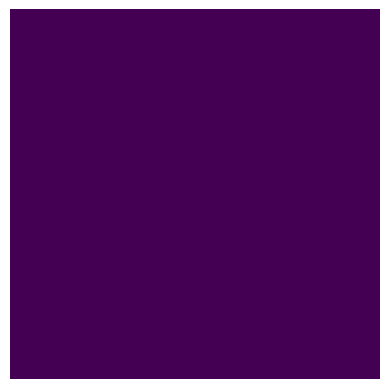

0xe8, INX
PC: 0x06b6, SP: 0xf9, A: 0x10, X: 0x02, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 0]


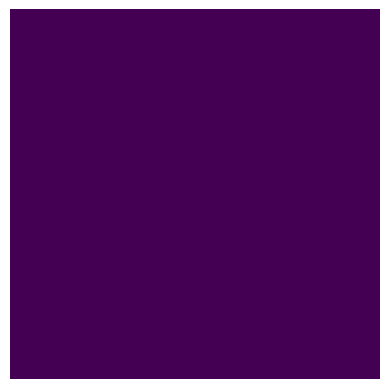

0xe8, INX
PC: 0x06b7, SP: 0xf9, A: 0x10, X: 0x03, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


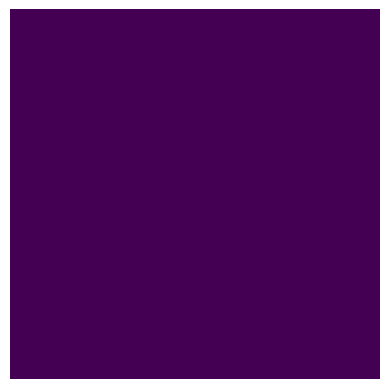

0xe4, CPX
PC: 0x06b8, SP: 0xf9, A: 0x10, X: 0x04, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


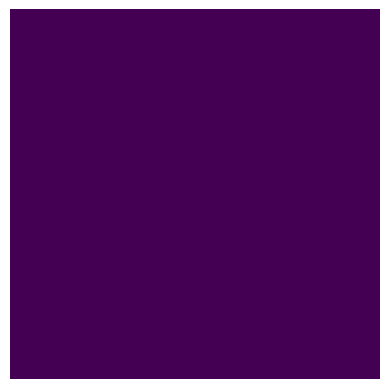

0xf0, BEQ
PC: 0x06ba, SP: 0xf9, A: 0x10, X: 0x04, Y: 0x00, [0, 0, 1, 1, 0, 0, 1, 1]


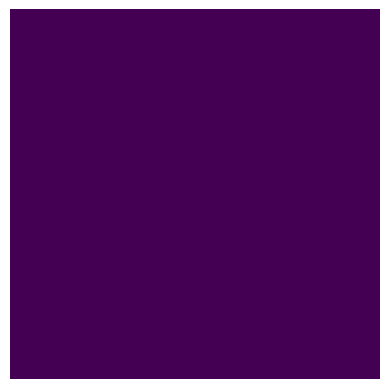

0x60, RTS
PC: 0x06c2, SP: 0xf9, A: 0x10, X: 0x04, Y: 0x00, [0, 0, 1, 1, 0, 0, 1, 1]


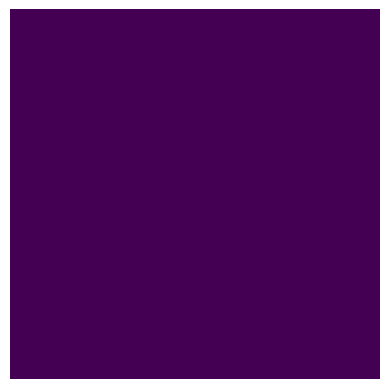

0x60, RTS
PC: 0x0693, SP: 0xfb, A: 0x10, X: 0x04, Y: 0x00, [0, 0, 1, 1, 0, 0, 1, 1]


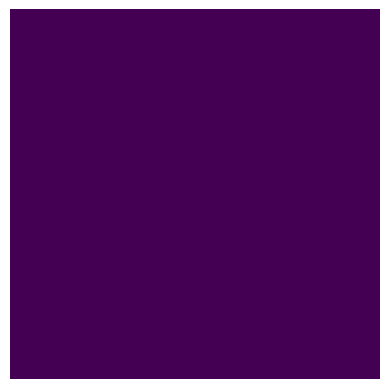

0x20, JSR
PC: 0x063e, SP: 0xfd, A: 0x10, X: 0x04, Y: 0x00, [0, 0, 1, 1, 0, 0, 1, 1]


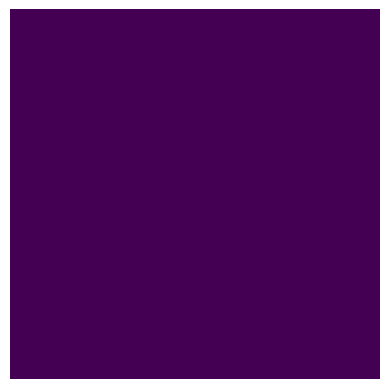

0xa6, LDX
PC: 0x06c3, SP: 0xfb, A: 0x10, X: 0x04, Y: 0x00, [0, 0, 1, 1, 0, 0, 1, 1]


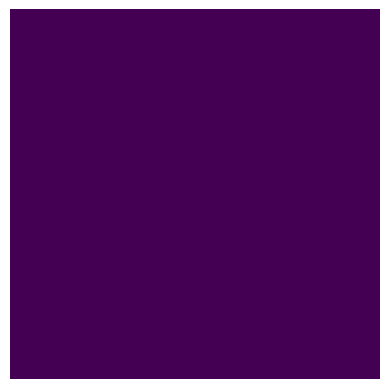

0xca, DEX
PC: 0x06c5, SP: 0xfb, A: 0x10, X: 0x04, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


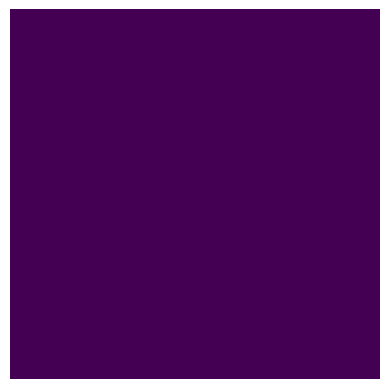

0x8a, TXA
PC: 0x06c6, SP: 0xfb, A: 0x10, X: 0x03, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


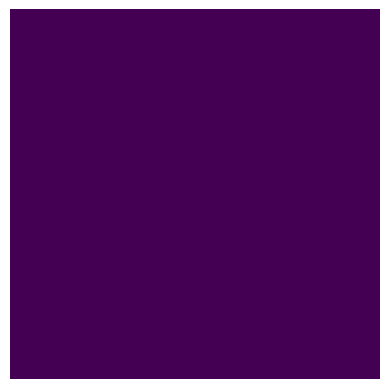

0xb5, LDA
PC: 0x06c7, SP: 0xfb, A: 0x03, X: 0x03, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


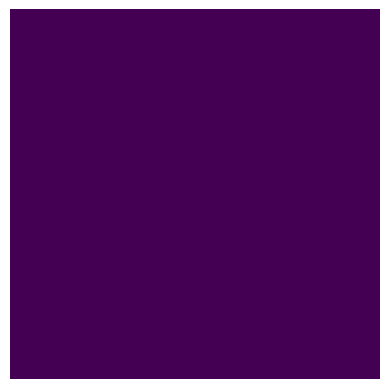

0x95, STA
PC: 0x06c9, SP: 0xfb, A: 0x04, X: 0x03, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


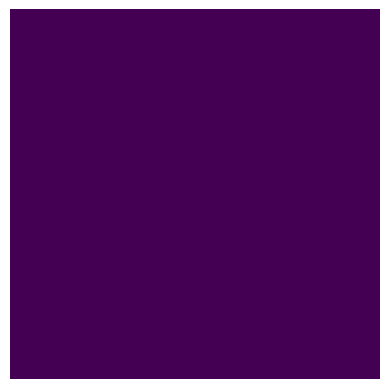

0xca, DEX
PC: 0x06cb, SP: 0xfb, A: 0x04, X: 0x03, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


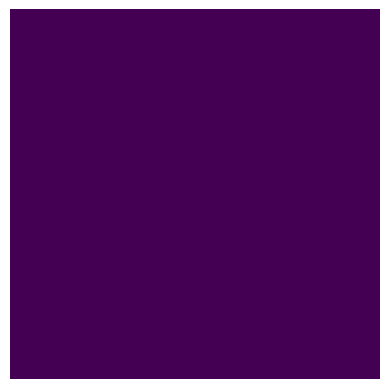

0x10, BPL
PC: 0x06cc, SP: 0xfb, A: 0x04, X: 0x02, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


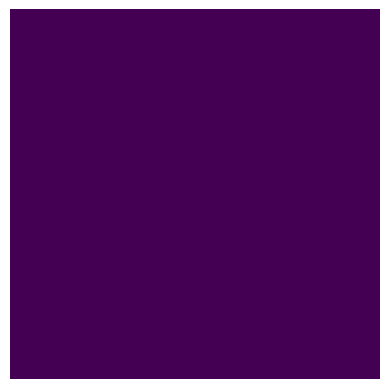

0xb5, LDA
PC: 0x06c7, SP: 0xfb, A: 0x04, X: 0x02, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


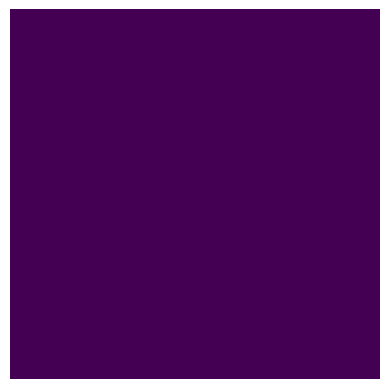

0x95, STA
PC: 0x06c9, SP: 0xfb, A: 0x10, X: 0x02, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


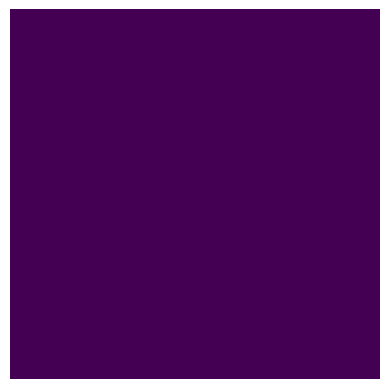

0xca, DEX
PC: 0x06cb, SP: 0xfb, A: 0x10, X: 0x02, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


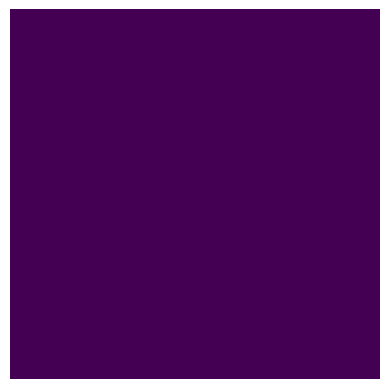

0x10, BPL
PC: 0x06cc, SP: 0xfb, A: 0x10, X: 0x01, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


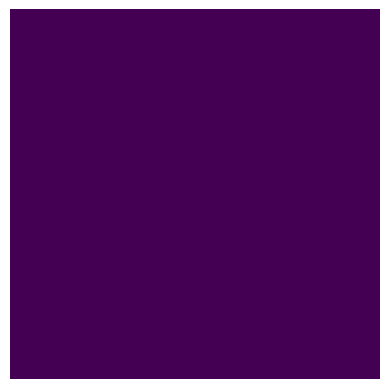

0xb5, LDA
PC: 0x06c7, SP: 0xfb, A: 0x10, X: 0x01, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


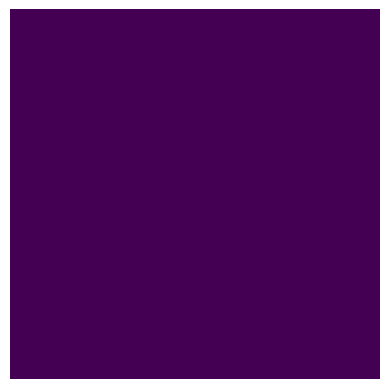

0x95, STA
PC: 0x06c9, SP: 0xfb, A: 0x04, X: 0x01, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


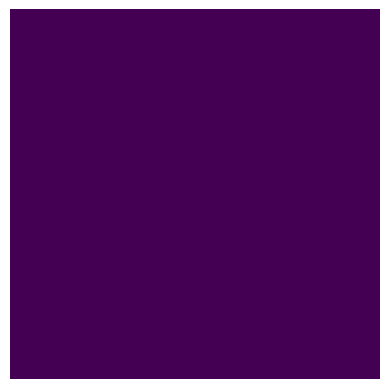

0xca, DEX
PC: 0x06cb, SP: 0xfb, A: 0x04, X: 0x01, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


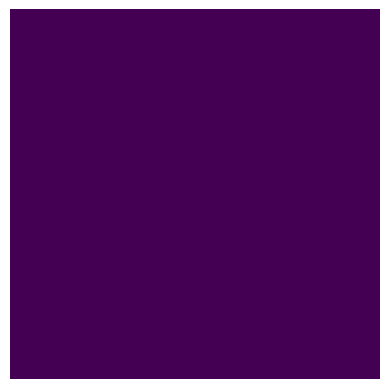

0x10, BPL
PC: 0x06cc, SP: 0xfb, A: 0x04, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 1, 1]


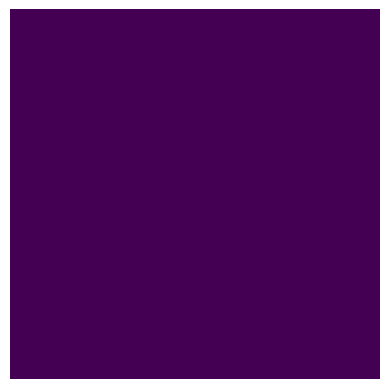

0xb5, LDA
PC: 0x06c7, SP: 0xfb, A: 0x04, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 1, 1]


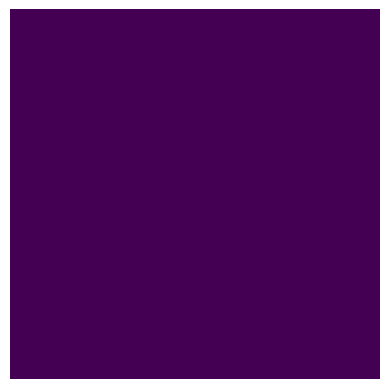

0x95, STA
PC: 0x06c9, SP: 0xfb, A: 0x11, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


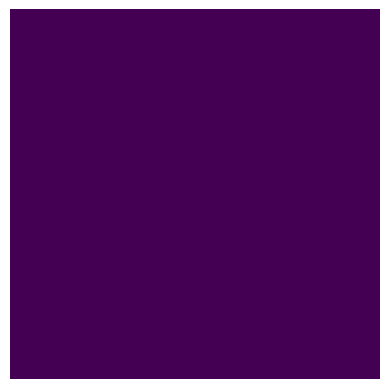

0xca, DEX
PC: 0x06cb, SP: 0xfb, A: 0x11, X: 0x00, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


c:\Users\David\Documents\Coding\daveNES\notebooks\../src\cpu.py:537: RuntimeWarning: overflow encountered in ubyte_scalars
  self.r_index_X -= np.uint8(1)


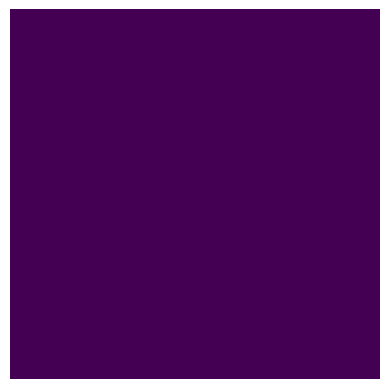

0x10, BPL
PC: 0x06cc, SP: 0xfb, A: 0x11, X: 0xff, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 1]


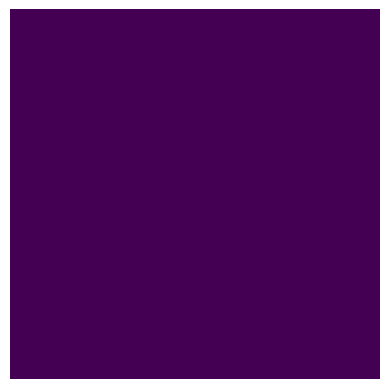

0xa5, LDA
PC: 0x06ce, SP: 0xfb, A: 0x11, X: 0xff, Y: 0x00, [1, 0, 1, 1, 0, 0, 0, 1]


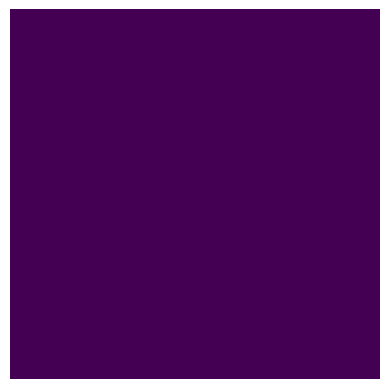

0x4a, LSR
PC: 0x06d0, SP: 0xfb, A: 0x02, X: 0xff, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


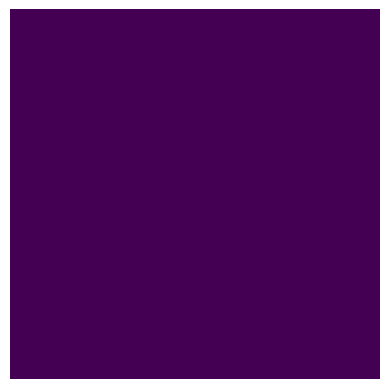

0xb0, BCS
PC: 0x06d1, SP: 0xfb, A: 0x01, X: 0xff, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


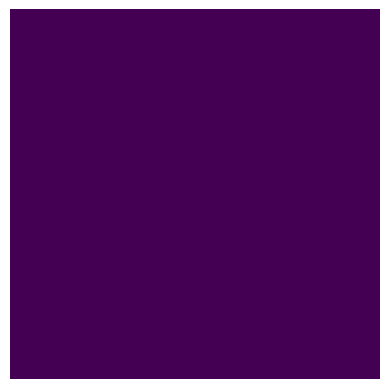

0x4a, LSR
PC: 0x06d3, SP: 0xfb, A: 0x01, X: 0xff, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 0]


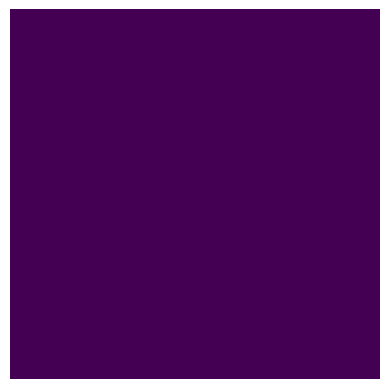

0xb0, BCS
PC: 0x06d4, SP: 0xfb, A: 0x00, X: 0xff, Y: 0x00, [0, 0, 1, 1, 0, 0, 1, 1]


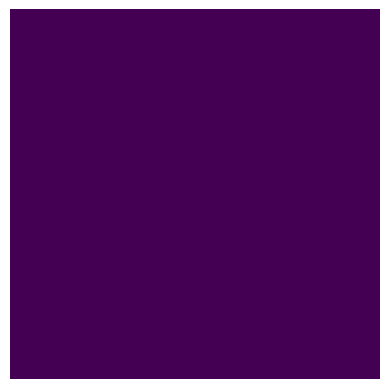

0x10, BPL
PC: 0x06f0, SP: 0xfb, A: 0x00, X: 0xff, Y: 0x00, [0, 0, 1, 1, 0, 0, 1, 1]


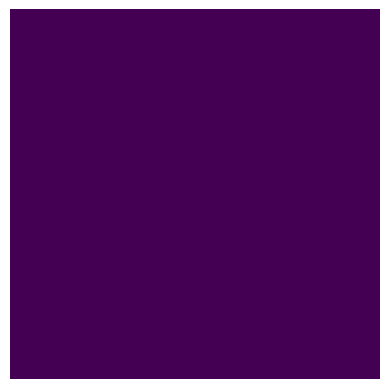

0x1, ORA
PC: 0x069b, SP: 0xfb, A: 0x00, X: 0xff, Y: 0x00, [0, 0, 1, 1, 0, 0, 1, 1]


c:\Users\David\Documents\Coding\daveNES\notebooks\../src\cpu.py:304: RuntimeWarning: overflow encountered in ubyte_scalars
  base + self.r_index_X


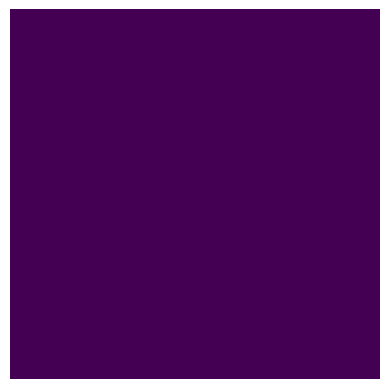

0xc5, CMP
PC: 0x069c, SP: 0xfb, A: 0x0f, X: 0xff, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


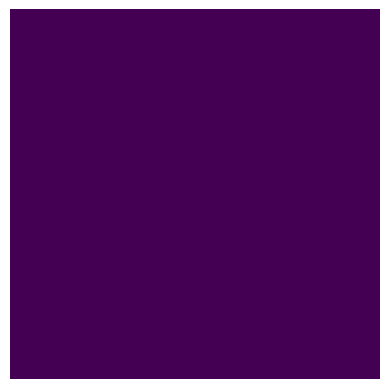

0xd0, BNE
PC: 0x069e, SP: 0xfb, A: 0x0f, X: 0xff, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


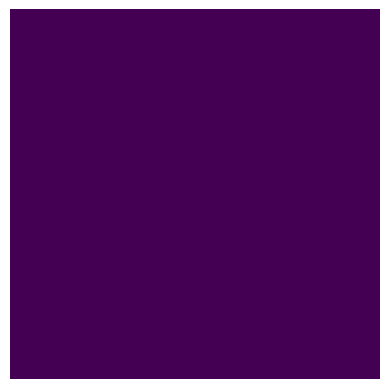

0x60, RTS
PC: 0x06a7, SP: 0xfb, A: 0x0f, X: 0xff, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


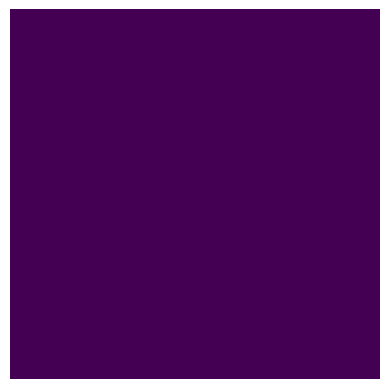

0x20, JSR
PC: 0x0641, SP: 0xfd, A: 0x0f, X: 0xff, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


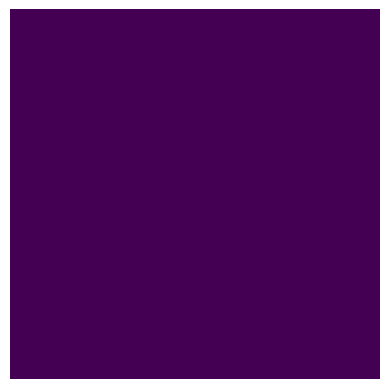

0xa0, LDY
PC: 0x0719, SP: 0xfb, A: 0x0f, X: 0xff, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


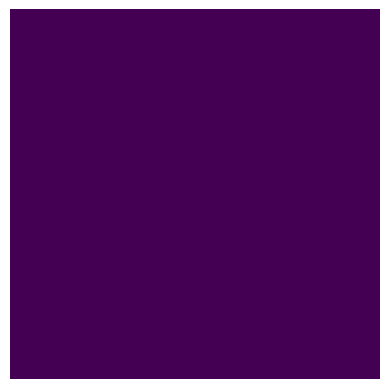

0xa5, LDA
PC: 0x071b, SP: 0xfb, A: 0x0f, X: 0xff, Y: 0x00, [0, 0, 1, 1, 0, 0, 1, 1]


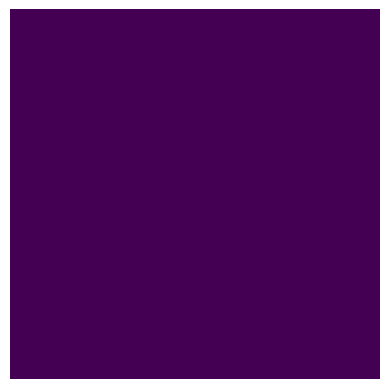

0x91, STA
PC: 0x071d, SP: 0xfb, A: 0x0a, X: 0xff, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


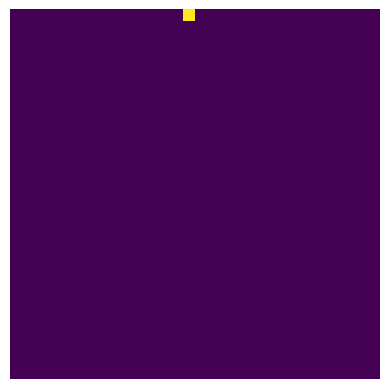

0x0, BRK
PC: 0x071e, SP: 0xfb, A: 0x0a, X: 0xff, Y: 0x00, [0, 0, 1, 1, 0, 0, 0, 1]


In [4]:
daveNES.run_program()
#daveNES.ram.visualise_memory()
#print(daveNES.ram.memory[0x0200: 0x0205])
daveNES.reset()

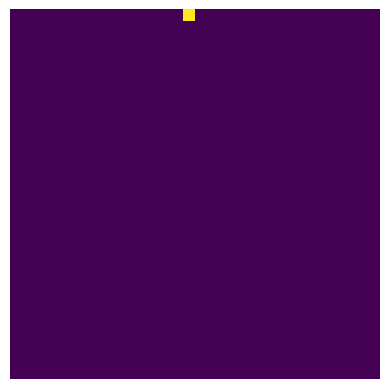

In [5]:
daveNES.ram.visualise_memory()